In [5]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

In [10]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()

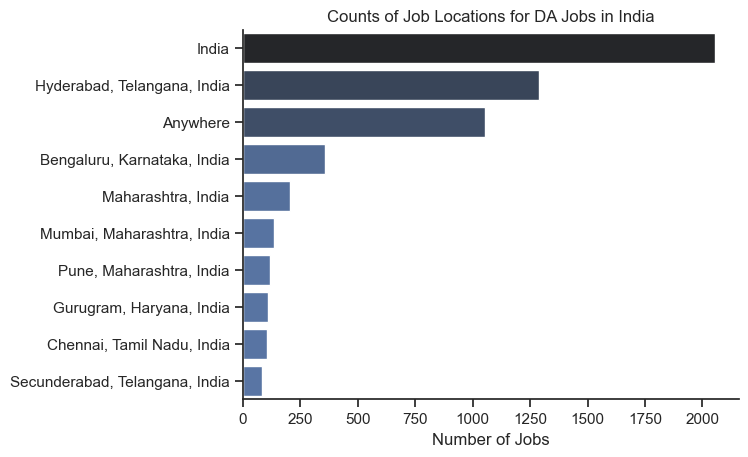

In [14]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y="job_location", hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for DA Jobs in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

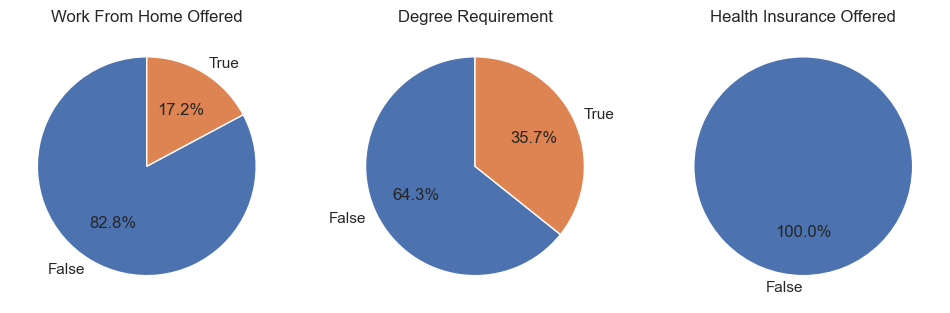

In [25]:
dict_column = {
    'job_work_from_home': "Work From Home Offered",
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title) in enumerate(dict_column.items()):
    value_counts = df_DA_India[column].value_counts()
    labels = value_counts.index.astype(str) 
    ax[i].pie(df_DA_India[column].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)